In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [4]:
sns.set(font_scale=1.2)
sns.set_style("ticks")

## Read results on TCR sequences

In [5]:

ilp_fname = "./results_0502/ilp_output_more_0502.csv"
lp_fname = "./results_0502//ilp_output_more_lp_0502.csv"

In [7]:
lp_df =  pd.read_csv(lp_fname)
for i, row in lp_df.iterrows():
    suf1 = int(row["g1"].lstrip("simulated"))
    suf2 = int(row["g2"].lstrip("simulated"))
    if suf1 > suf2:
        lp_df.loc[i,"g1"] = row["g2"]
        lp_df.loc[i,"g2"] = row["g1"] 
        
ilp_df =  pd.read_csv(ilp_fname)
for i, row in ilp_df.iterrows():
    suf1 = int(row["g1"].lstrip("simulated"))
    suf2 = int(row["g2"].lstrip("simulated"))
    if suf1 > suf2:
        
        tmp = row["g1"]
        ilp_df.loc[i,"g1"] = row["g2"]
        ilp_df.loc[i,"g2"] = row["g1"]
        

In [9]:
lp_df = lp_df.set_index(["g1","g2"])
ilp_df = ilp_df.set_index(["g1","g2"])
ilp_lp_join = ilp_df.join(lp_df, lsuffix="_ilp", rsuffix="_lp")
ilp_df = ilp_df[ilp_df["gted"] == ilp_df["ccted"]]

## Plot results on TCR sequences

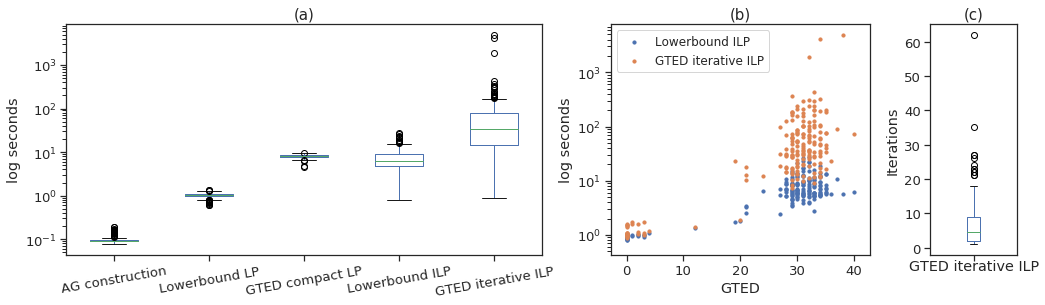

In [10]:
fig, axes = plt.subplots(1,3, sharey=False)

ilp_time_df = ilp_lp_join[["ag_time","ccted_time_lp","gted_time_lp","ccted_time_ilp","gted_time_ilp"]]
ilp_time_df.columns = ["AG construction","Lowerbound LP", "GTED compact LP", "Lowerbound ILP", "GTED iterative ILP" ]
axes[0] = ilp_time_df.plot.box(ax = axes[0])
# ilp_time_df.mean().to_frame().transpose()
axes[0].set_yscale("log")
axes[0].set_ylabel("log seconds")

ilp_lp_plot = ilp_lp_join[ilp_lp_join["gted_time_ilp"] < 10000]

axes[1].scatter(ilp_lp_plot["gted_ilp"], ilp_lp_plot["ccted_time_ilp"], s=10, label="Lowerbound ILP")
axes[1].scatter(ilp_lp_plot["gted_ilp"], ilp_lp_plot["gted_time_ilp"], s=10,  label="GTED iterative ILP")
axes[1].set_yscale("log")
axes[1].set_ylabel("log seconds")
ilp_df["iteration"].plot.box(ax=axes[2])
# axes[2].set_yscale("log")
axes[2].set_ylabel("Iterations")
axes[2].set_xlabel("GTED iterative ILP")

axes[0].set_position([0.1, 0.1, 0.55, 0.8])
axes[1].set_position([0.73, 0.1, 0.3, 0.8])
axes[2].set_position([1.1, 0.1, 0.1, 0.8])

axes[1].legend(fontsize=12)
axes[1].set_xlabel("GTED")

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 10)
# axes[2].legend(loc = "lower left")
# axes[2].set_xlabel("Edit distance")


# sns.boxplot(data=melt_df, x="variable", y="value", order=[ "GTED iterative ILP", "CCTED ILP"], hue="GTED = CCTED",ax=axes[1])
# axes[1].set_ylabel("a")

axes[0].set_title("(a)", fontsize=15)
axes[1].set_title("(b)", fontsize=15)
axes[2].set_title("(c)", fontsize=15)

for ax in axes.flatten():
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
axes[-1].xaxis.set_tick_params(labelbottom=False)

fig.set_size_inches(12,4)
fig.savefig("runtime_tcr.pdf", bbox_inches="tight")
# fig.tight_layout()

In [12]:
# get min and max of different measurements
print(ilp_df[ilp_df["gted"] == ilp_df["ccted"]].mean())
print(ilp_df[ilp_df["gted"] == ilp_df["ccted"]].max())


ccted            25.726190
iteration         6.821429
gted             25.726190
edit_distance    48.059524
gted_time        70.708174
ccted_time        7.397152
dtype: float64
ccted              40.000000
iteration          62.000000
gted               40.000000
edit_distance      79.000000
gted_time        1920.453841
ccted_time         26.948376
dtype: float64


## Read 3cycle graph results

In [18]:
cycle_df = pd.read_csv("./results_0502/3cycle_output.csv")

In [19]:
cycle_df["gted - ccted"] = cycle_df["gted_compact"] - cycle_df["ccted"]

In [20]:
cycle_df.abs().groupby("gted - ccted").count()

,gted_compact,time_gted_compact,ccted,time_ccted,iteration,gted,time_gted_it
gted - ccted,,,,,,,
1.0,20,20,20,20,20,20,20
2.0,20,20,20,20,20,20,20
3.0,20,20,20,20,20,20,20
4.0,20,20,20,20,20,20,20
5.0,20,20,20,20,20,20,20


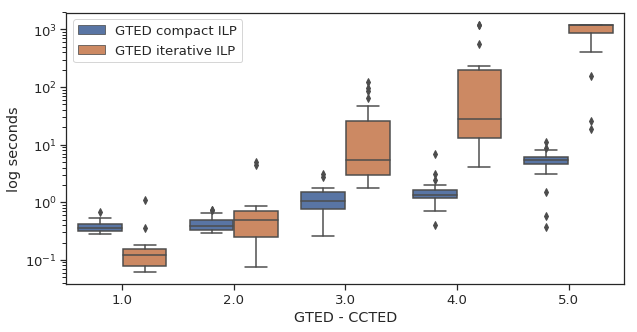

In [22]:
fig, ax = plt.subplots()

cycle_df1 = cycle_df[["gted - ccted", "time_gted_compact", "time_gted_it"]]
cycle_df1.columns = ["GTED - CCTED", "GTED compact ILP", "GTED iterative ILP"]
cycle_box_df = pd.melt(cycle_df1[ ["GTED - CCTED", "GTED compact ILP", "GTED iterative ILP"]], id_vars="GTED - CCTED")
sns.boxplot(data=cycle_box_df, x="GTED - CCTED", y="value", hue="variable", ax = ax)
ax.set_yscale("log")
ax.set_ylabel("log seconds")
ax.legend(title="")

fig.set_size_inches(10,5)
fig.savefig("runtime_3cycle.pdf", bbox_inches="tight")
# sns.scatterplot(data=cycle_df, x="gted - ccted", y="time_gted_compact")
# sns.scatterplot(data=cycle_df, x="gted - ccted", y="time_gted_it")